In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv('GOOGL.csv')
d

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [3]:
d= d['Close'].values

In [4]:
d

array([  50.220219,   54.209209,   54.754753, ..., 2797.360107,
       2765.51001 , 2831.439941])

In [5]:
sc = MinMaxScaler()
d = sc.fit_transform(d.reshape(-1,1))

In [6]:
d

array([[5.60505519e-05],
       [1.40975800e-03],
       [1.59489433e-03],
       ...,
       [9.32328062e-01],
       [9.21519383e-01],
       [9.43893427e-01]])

In [7]:
x=[]
y=[]

for i in range(60, len(d)):
    x.append(d[ i-60:i , 0])
    y.append(d[i , 0])

x= np.array(x)
y= np.array(y)



In [8]:
x=np.reshape(x, (x.shape[0], x.shape[1], 1))

In [9]:
x

array([[[5.60505519e-05],
        [1.40975800e-03],
        [1.59489433e-03],
        ...,
        [1.16670188e-02],
        [1.15243454e-02],
        [1.40992758e-02]],

       [[1.40975800e-03],
        [1.59489433e-03],
        [8.25473121e-04],
        ...,
        [1.15243454e-02],
        [1.40992758e-02],
        [1.39260273e-02]],

       [[1.59489433e-03],
        [8.25473121e-04],
        [1.01740448e-03],
        ...,
        [1.40992758e-02],
        [1.39260273e-02],
        [1.44134989e-02]],

       ...,

       [[9.80167766e-01],
        [9.86887046e-01],
        [9.78610069e-01],
        ...,
        [8.91407892e-01],
        [9.06926862e-01],
        [9.06763975e-01]],

       [[9.86887046e-01],
        [9.78610069e-01],
        [9.78392915e-01],
        ...,
        [9.06926862e-01],
        [9.06763975e-01],
        [9.32328062e-01]],

       [[9.78610069e-01],
        [9.78392915e-01],
        [9.75308094e-01],
        ...,
        [9.06763975e-01],
        [9.3232

In [10]:
y

array([0.01392603, 0.0144135 , 0.01231924, ..., 0.93232806, 0.92151938,
       0.94389343])

In [11]:
d

array([[5.60505519e-05],
       [1.40975800e-03],
       [1.59489433e-03],
       ...,
       [9.32328062e-01],
       [9.21519383e-01],
       [9.43893427e-01]])

In [15]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.94))

model.add(LSTM(units=50))
model.add(Dropout(0.94))

model.add(Dense(1))

C:\Users\heman\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer='adam', loss='mse')

In [17]:
model.fit(x, y, epochs=5, batch_size=32) 

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0672
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.0285
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0201
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 0.0182
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0154


In [18]:
pred = model.predict(x)
pred = sc.inverse_transform(pred)

137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step


In [19]:
actual = sc.inverse_transform(y.reshape(-1,1))

Text(0, 0.5, 'Google Stock Price')

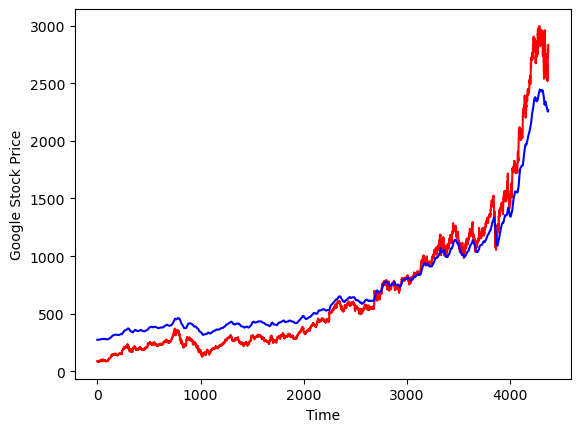

In [20]:
plt.plot(actual, color='red', label='Actual price')
plt.plot(pred, color='blue', label='Predicted price')
plt.xlabel("Time")
plt.ylabel("Google Stock Price")